# ![image.png](attachment:image.png)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = '/content/drive/My Drive/Namsik-Lab/딥러닝 공부/keras/data/'

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
np.random.seed(3)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255) ## 이미지의 색농도를 0~1사이값으로전환
train_generator = train_datagen.flow_from_directory(
        root_dir+'남식이가그린 CNN data/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        root_dir+'남식이가그린 CNN data/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 60 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation = 'relu',
                input_shape=(24,24,3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


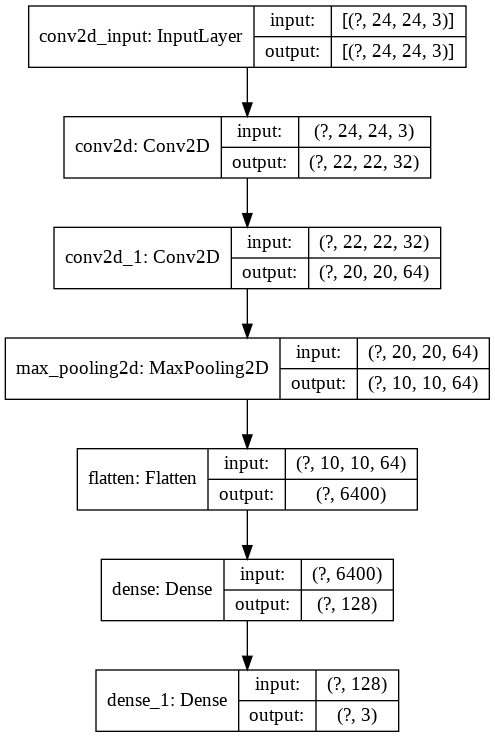

In [8]:
# 모델 구조 보기
from tensorflow.keras.utils import plot_model
%matplotlib inline

plot_model(model, show_shapes= True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 20s 1s/step - loss: 1.1384 - acc: 0.4444 - val_loss: 0.7144 - val_acc: 0.9333
Epoch 2/50
15/15 [==============================] - 1s 34ms/step - loss: 0.4546 - acc: 0.8667 - val_loss: 0.2761 - val_acc: 0.8000
Epoch 3/50
15/15 [==============================] - 0s 26ms/step - loss: 0.3290 - acc: 0.8889 - val_loss: 0.1159 - val_acc: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 24ms/step - loss: 0.1491 - acc: 0.9778 - val_loss: 0.0694 - val_acc: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 26ms/step - loss: 0.0823 - acc: 1.0000 - val_loss: 0.0318 - val_acc: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 29ms/step - loss: 0.0724 - acc: 0.9778 - val_loss: 0.0252 - val_acc: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0488 - acc: 0.9778 - val_loss: 0.0309 - val_acc: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0269 - ac

In [11]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 100.00%


In [12]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.001 0.000 0.999]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]]


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        root_dir+'남식이가그린 CNN data/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        root_dir+'남식이가그린 CNN data/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 60 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.4265 - acc: 0.8338 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 2/200
1500/1500 [==============================] - 35s 24ms/step - loss: 0.1364 - acc: 0.9578 - val_loss: 6.2793e-05 - val_acc: 1.0000
Epoch 3/200
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0989 - acc: 0.9664 - val_loss: 5.2593e-05 - val_acc: 1.0000
Epoch 4/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0818 - acc: 0.9733 - val_loss: 1.5497e-06 - val_acc: 1.0000
Epoch 5/200
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0548 - acc: 0.9818 - val_loss: 8.7420e-08 - val_acc: 1.0000
Epoch 6/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0493 - acc: 0.9833 - val_loss: 8.1857e-07 - val_acc: 1.0000
Epoch 7/200
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0502 - acc: 0.9849 - val_loss: 1.2716e-07 - val_acc: 1.0000
Epoch 8/200
1500/

KeyboardInterrupt: ignored